# Life Expectency & GDP #

In [12]:
# import the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from matplotlib.pyplot import cm

Inspecting the dataset for the first time.

In [13]:
who_data = pd.read_csv("all_data.csv")
print(f"Columns: {who_data.columns.tolist()}\n")
#print(who_data.head())
#print(who_data.dtypes)
#print(who_data.isnull().count())

Columns: ['Country', 'Year', 'Life expectancy at birth (years)', 'GDP']



Running summary statistics on the numerical columns.
Viewing the unique values of the categorical columns

In [14]:
print(f"Countries in the dataset: {who_data.Country.unique()}\n")
print(f"Life expectancy statistics:\n{who_data['Life expectancy at birth (years)'].describe()}\n")
print(f"GDP statistics:\n{who_data['GDP'].describe()}\n")
print(f"Time range in our dataset: \n{who_data.Year.min()} to {who_data.Year.max()}")

Countries in the dataset: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']

Life expectancy statistics:
count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life expectancy at birth (years), dtype: float64

GDP statistics:
count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64

Time range in our dataset: 
2000 to 2015


The data appears well cleaned.
The columns are even formatted!
Gross Domestic Product is given in U.S Dollars
Initially I thought had a country from every continent however, missing Australasia

I will rename the columns to remove capitalisation and make analysis easier

In [15]:
who_data.GDP = who_data.GDP /1e9
who_data.rename(columns={"Life expectancy at birth (years)":'life_expectancy', "GDP":'gdp_billions_usd', "Year":'year', "Country":'country'}, inplace=True)
who_data.country = who_data.country.apply(lambda x: 'USA' if x == "United States of America" else x)

In [16]:
print(f"New Columns: \n{who_data.columns.tolist()}")

New Columns: 
['country', 'year', 'life_expectancy', 'gdp_billions_usd']


Think we need to make some initial visualisations of life expectancy vs year with hue = country with a similar visualisation for GDP...

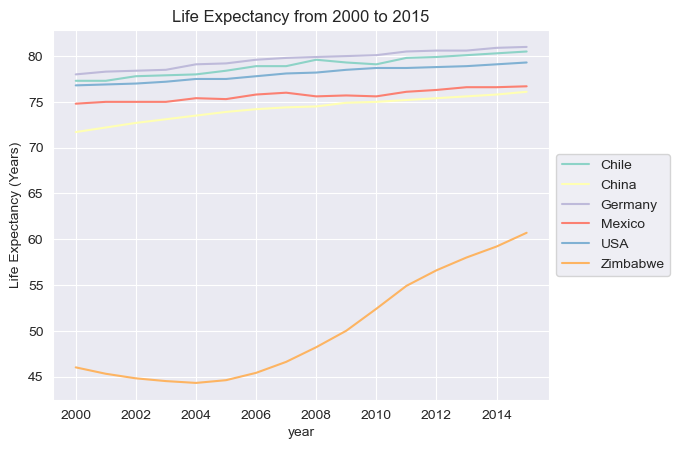

<Figure size 640x480 with 0 Axes>

In [17]:
sns.set_palette("Set3", 6)
sns.lineplot(x="year", y="life_expectancy", hue="country", data=who_data,)
plt.title("Life Expectancy from 2000 to 2015")
plt.ylabel("Life Expectancy (Years)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()
plt.clf()

Zimbabwe's life expectancy is significantly lower than the other 5 countries.
There's also a dip in 2004. Would be interesting to find out what was happening in Zimbabwe politically/economically in 2004
We need to separate our visualisations.

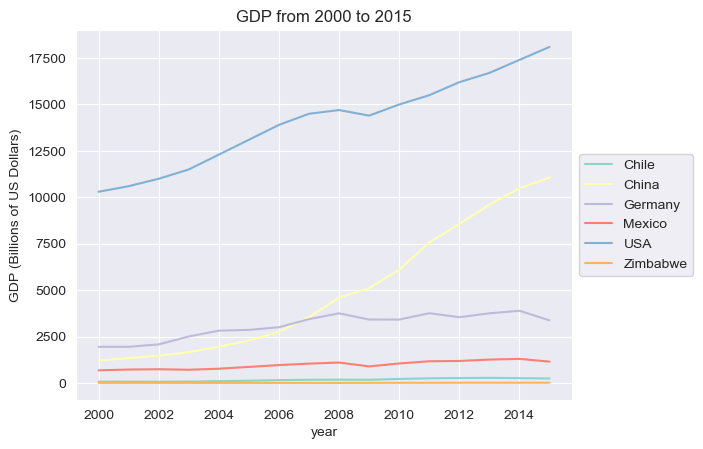

<Figure size 640x480 with 0 Axes>

In [18]:
sns.set_palette("Set3", 6)
sns.lineplot(x="year", y="gdp_billions_usd", hue="country", data=who_data)
plt.title("GDP from 2000 to 2015")
plt.ylabel("GDP (Billions of US Dollars)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()
plt.clf()

GDP has been displayed in the trillions of US dollars (10^13).
It's very difficult to see the relative growth of Chile, Mexico and Zimbabwe on this scale.

Could be an interesting exercise to have China go up against the USA

Will try and plot line graphs of life expectancy/country on the same axis
Then iterate through to produce for each country

##### Next need to iterate through the DataFrame and create graphs for each country #####

# Gross Domestic Product #

In [19]:
year_list = who_data['year'].unique().tolist()
country_list = who_data['country'].unique().tolist()
# 'Set3' Qualitative colors
colours = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462']

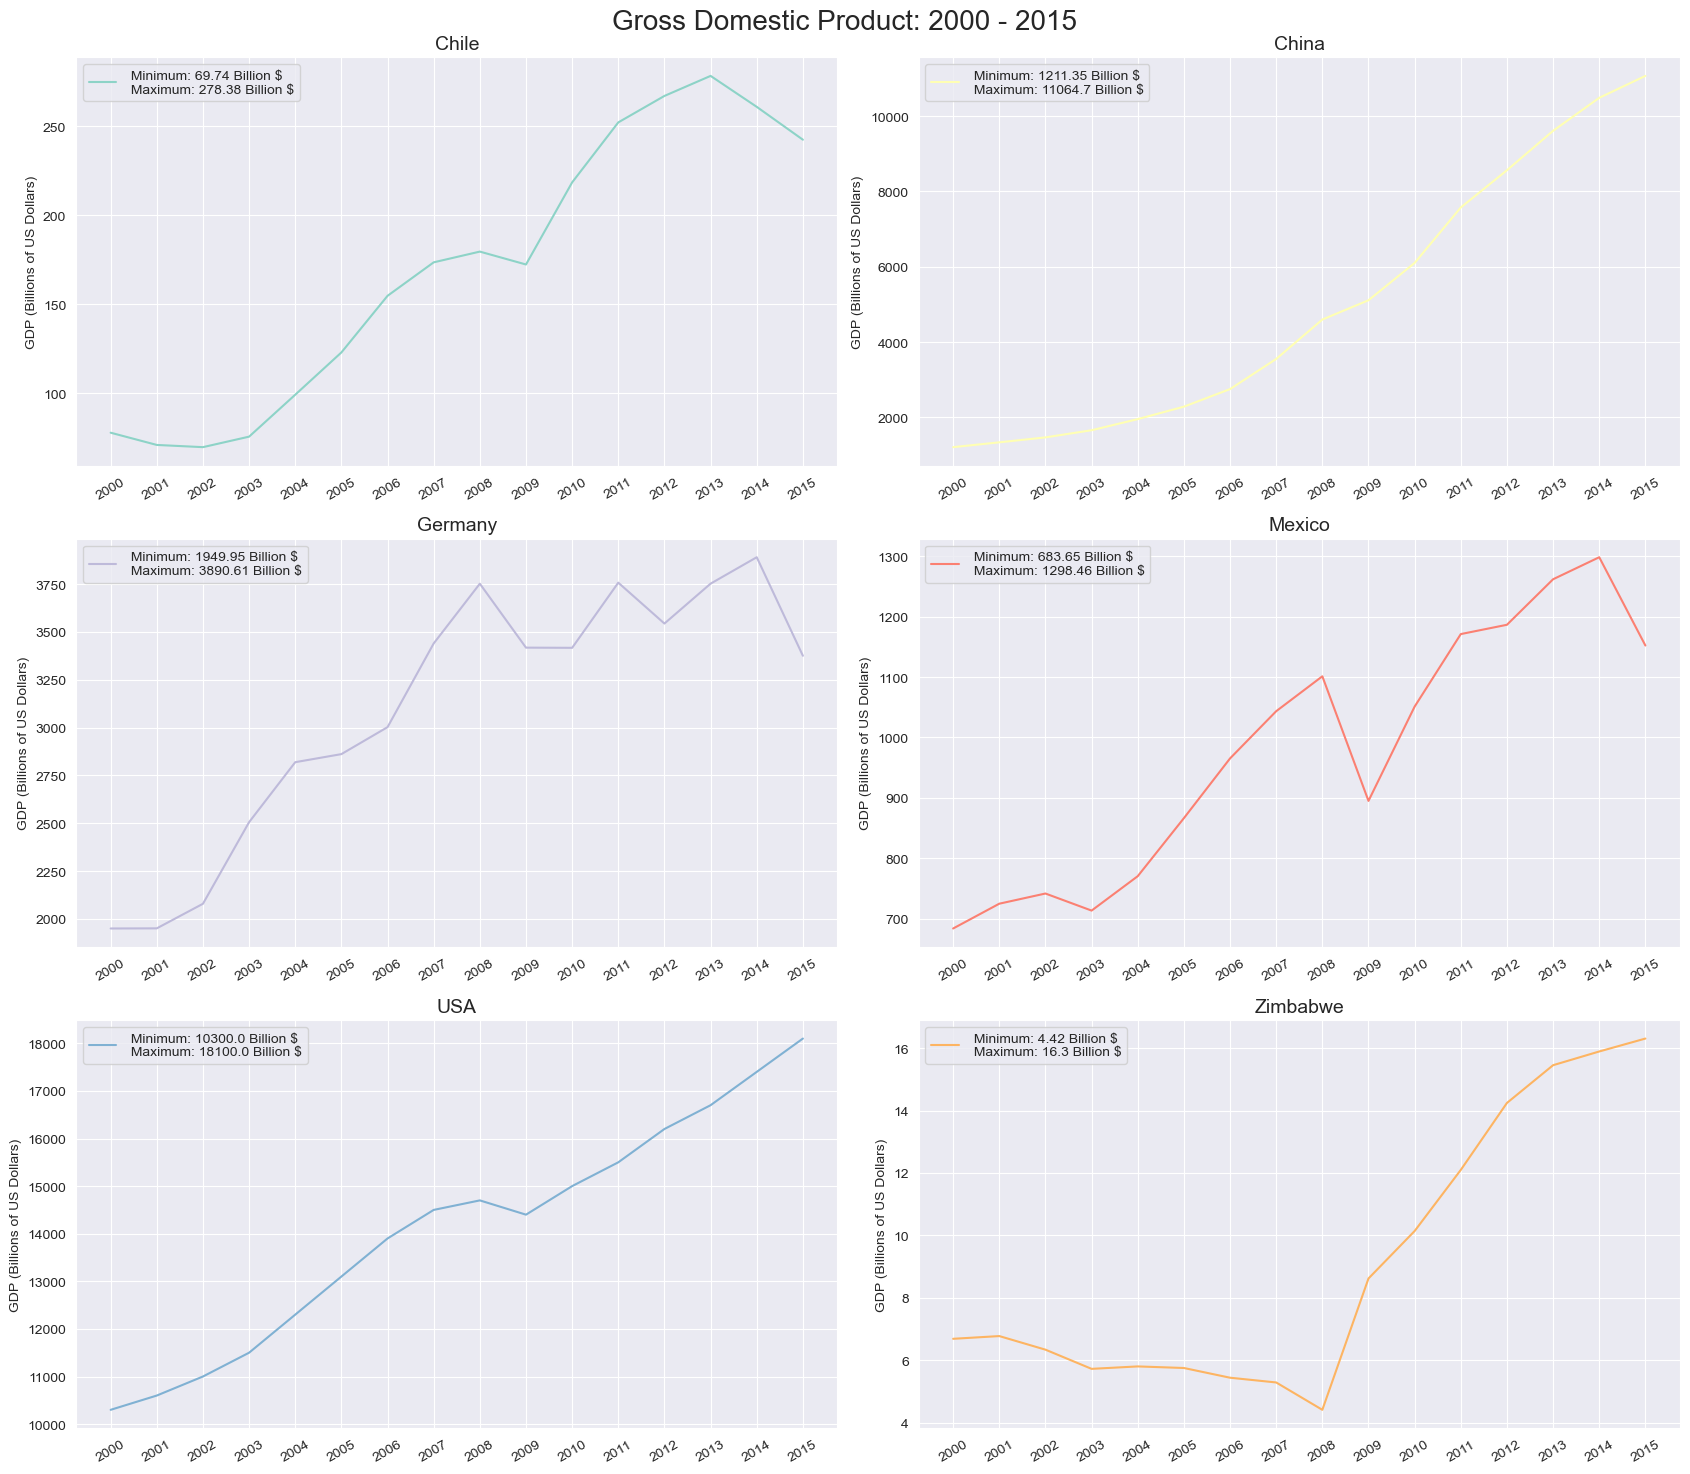

In [21]:
fig = plt.figure(figsize=(17, 15))
for i in range(len(country_list)):
    ax = plt.subplot(3,2,(i+1))
    country = country_list[i]
    data = who_data[who_data["country"] == country]
    #print(f"{country} Statistics:\n {data.describe()}\n")
    minimum = np.min(data['gdp_billions_usd'])
    maximum = np.max(data['gdp_billions_usd'])
    plt.plot(year_list, data['gdp_billions_usd'], color=colours[i])
    plt.ylabel("GDP (Billions of US Dollars)")
    plt.xticks(year_list, rotation=30)
    plt.title(country, fontsize=14)
    plt.legend([f" Minimum: {round(minimum, 2)} Billion $\n Maximum: {round(maximum, 2)} Billion $"])
fig.suptitle("Gross Domestic Product: 2000 - 2015", fontsize=20)
fig.tight_layout()
plt.show()

### Reflections ###

- The growth in GDP over the 15 years is linear for all countries

##### Zimbabwe #####
- Zimbabwe has a distinctive trough in 2008 after which there is huge economic growth
It would be interesting to see if this can be quantified:
###### Needed #######
- Political Upheaval research
- Calculating the strength of the linear growth

###### Need to create some pairings of countries ######
- USA vs China
- China vs Germany
- Mexico vs Chile




In [28]:
country_colors_zipped = zip(country_list, colours)
print(list(country_colors_zipped))

[('Chile', '#8dd3c7'), ('China', '#ffffb3'), ('Germany', '#bebada'), ('Mexico', '#fb8072'), ('USA', '#80b1d3'), ('Zimbabwe', '#fdb462')]


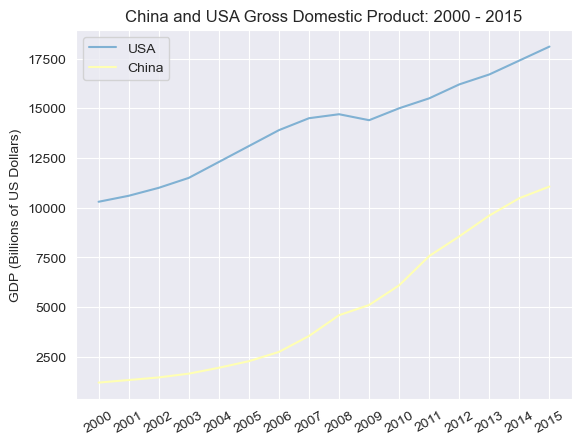

In [29]:
plt.plot(year_list, who_data.gdp_billions_usd[who_data.country == 'USA'], color='#80b1d3', label='USA')
plt.plot(year_list, who_data.gdp_billions_usd[who_data.country == "China"], color='#ffffb3', label='China')
plt.title("China and USA Gross Domestic Product: 2000 - 2015")
plt.xticks(year_list, rotation=30)
plt.ylabel("GDP (Billions of US Dollars)")
plt.legend()
plt.show()

### China closing the gap with the USA ###

- Investigate further the percentage that this gap represents
- USA open the new millennium with a GDP of a trillion$ - Is the growth proportional?


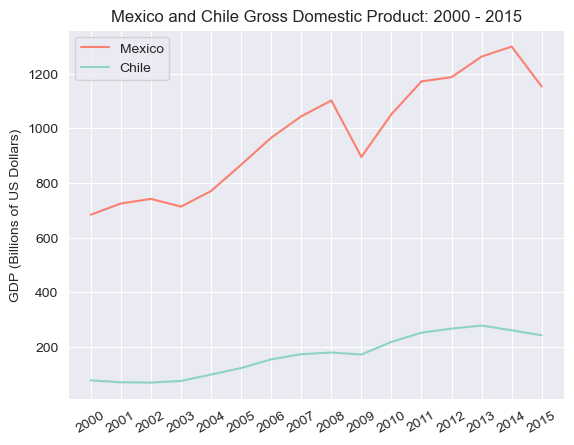

In [30]:
plt.plot(year_list, who_data.gdp_billions_usd[who_data.country == 'Mexico'], color='#fb8072', label='Mexico')
plt.plot(year_list, who_data.gdp_billions_usd[who_data.country == 'Chile'], color='#8dd3c7', label='Chile')
plt.title("Mexico and Chile Gross Domestic Product: 2000 - 2015")
plt.xticks(year_list, rotation=30)
plt.ylabel("GDP (Billions of US Dollars)")
plt.legend()
plt.show()

### Relative to Mexico, Chile's GDP seems stagnant ###

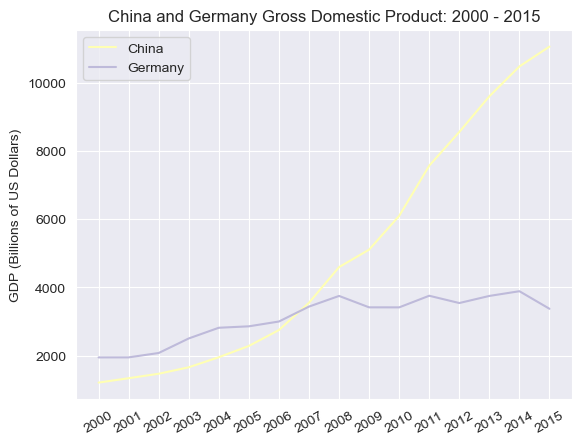

In [31]:
plt.plot(year_list, who_data.gdp_billions_usd[who_data.country == 'China'], color='#ffffb3', label='China')
plt.plot(year_list, who_data.gdp_billions_usd[who_data.country == 'Germany'], color='#bebada', label='Germany')
plt.title("China and Germany Gross Domestic Product: 2000 - 2015")
plt.xticks(year_list, rotation=30)
plt.ylabel("GDP (Billions of US Dollars)")
plt.legend()
plt.show()

### China's economic growth seems almost exponential in comparison to Germany ###

# Life Expectancy #

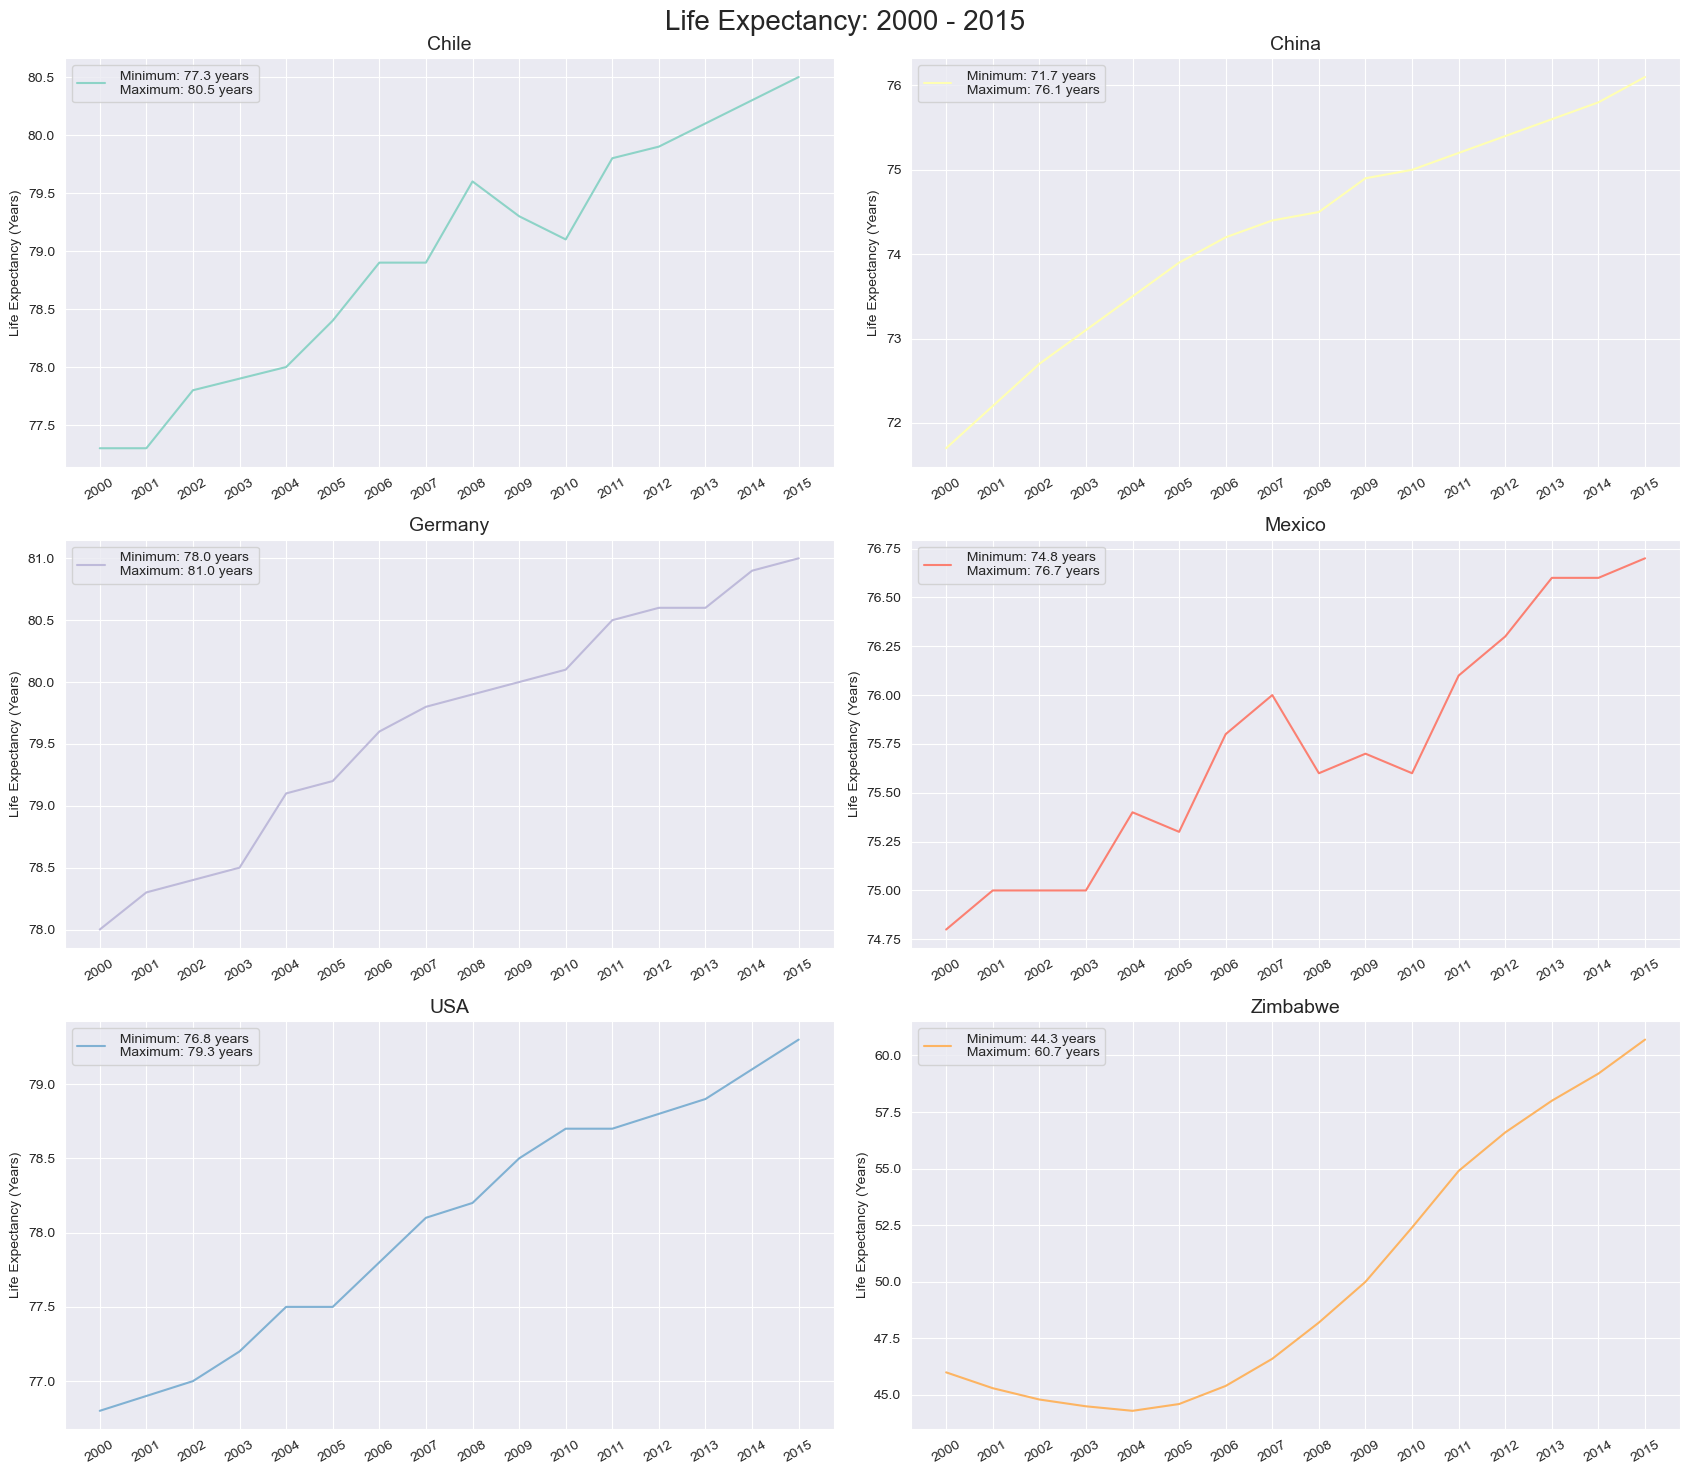

In [22]:
fig = plt.figure(figsize=(17, 15))
for i in range(len(country_list)):
    ax = plt.subplot(3,2,(i+1))
    country = country_list[i]
    data = who_data[who_data["country"] == country]
    minimum = np.min(data['life_expectancy'])
    maximum = np.max(data['life_expectancy'])
    #print(f"{country} Statistics:\n {data.describe()}\n")
    plt.plot(year_list, data['life_expectancy'], color=colours[i])
    plt.ylabel("Life Expectancy (Years)")
    plt.xticks(year_list, rotation=30)
    plt.title(country, fontsize=14)
    plt.legend([f" Minimum: {minimum} years\n Maximum: {maximum} years"])
fig.suptitle("Life Expectancy: 2000 - 2015", fontsize=20)
fig.tight_layout()
plt.show()

### Reflections ###

- Zimbabwe has the lowest life expectancy in 2004


How does the mean life expectancy compare amongst the countries in our dataset?



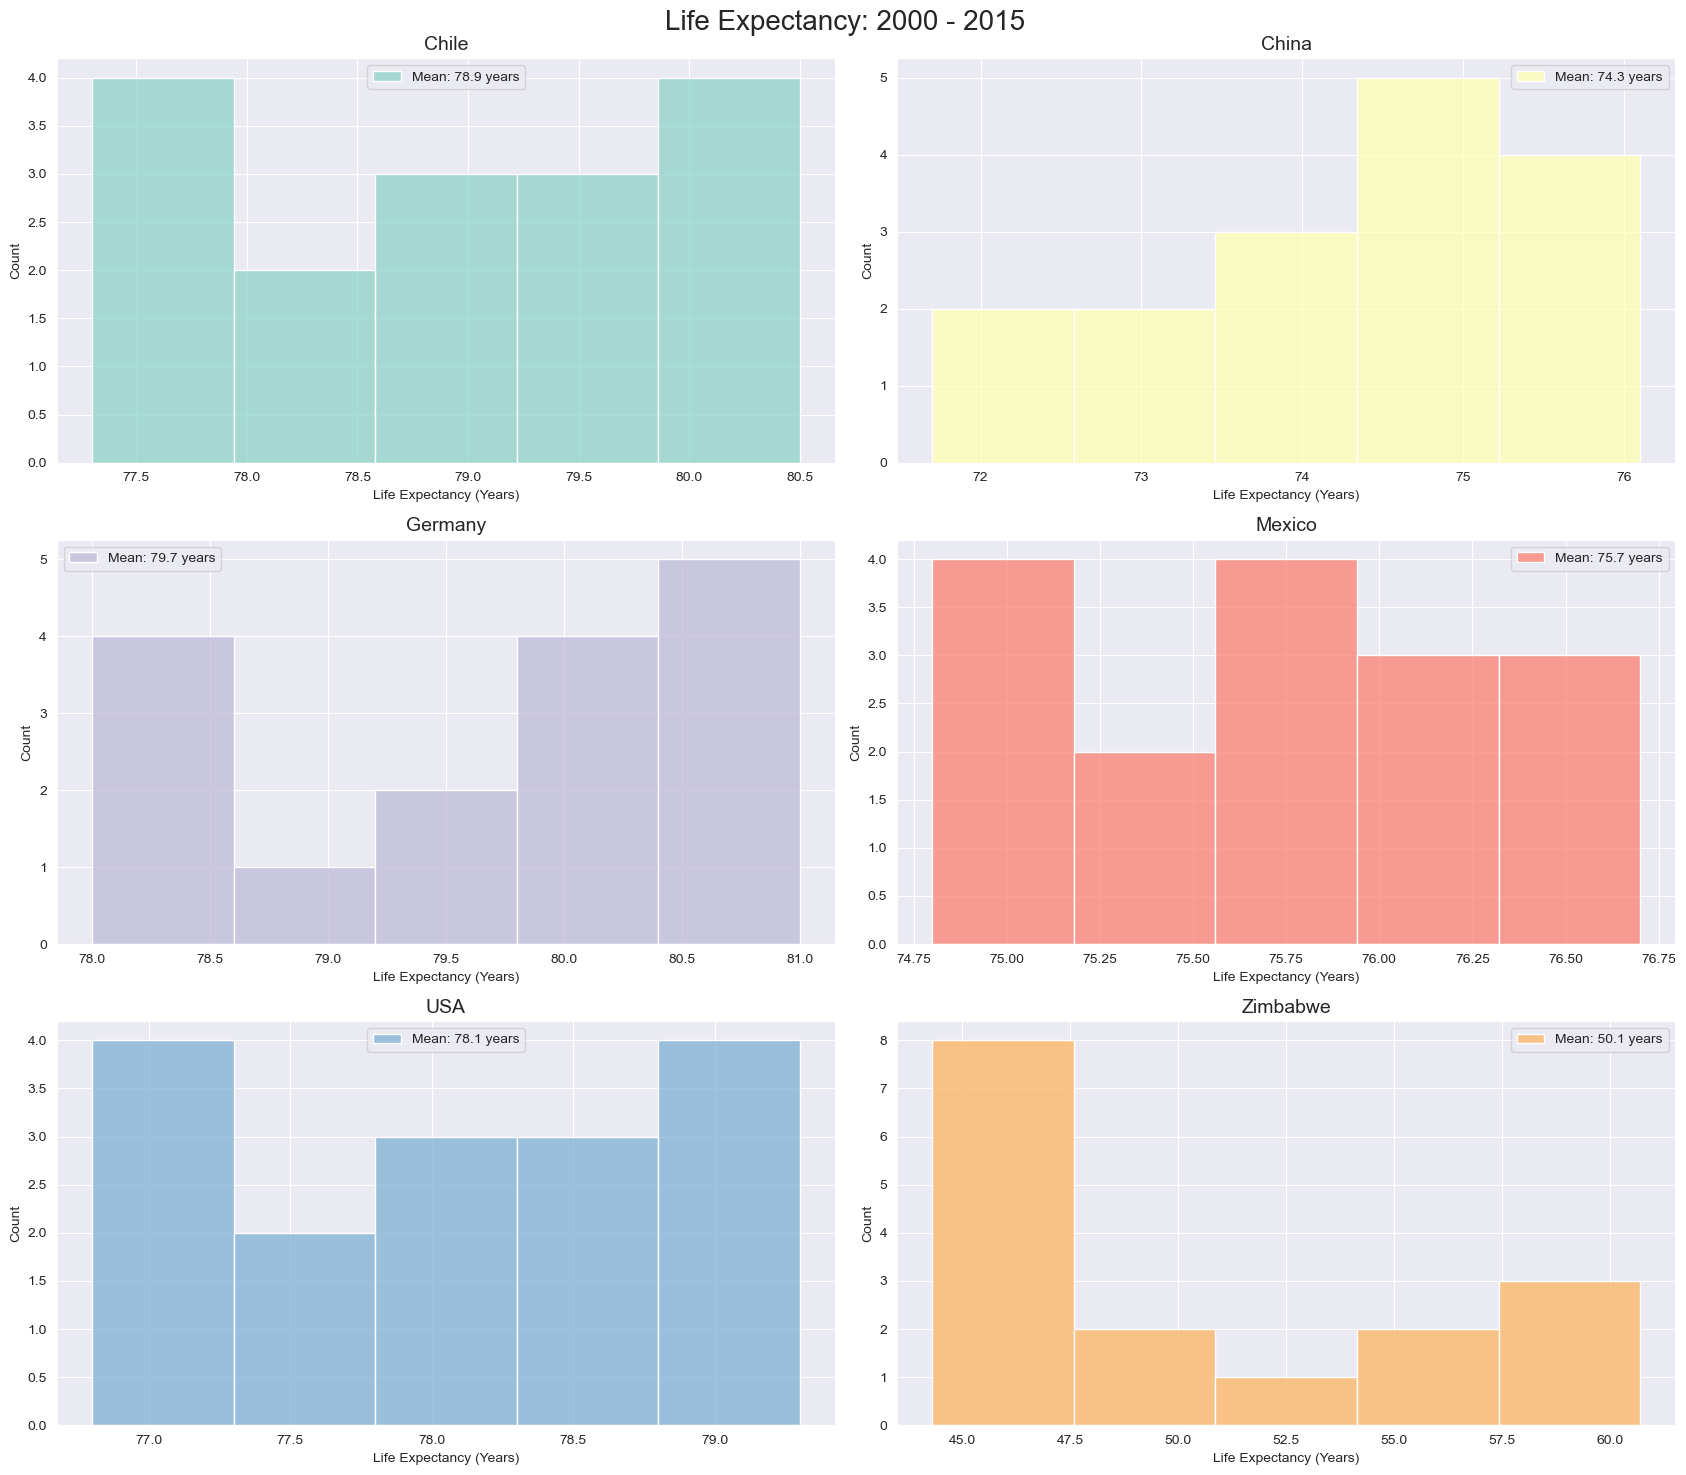

In [32]:
fig = plt.figure(figsize=(17, 15))
for i in range(len(country_list)):
    ax = plt.subplot(3,2,(i+1))
    country = country_list[i]
    data = who_data[who_data["country"] == country]
    mean = np.mean(data['life_expectancy'])
    sns.histplot(data['life_expectancy'], color=colours[i])
    plt.xlabel("Life Expectancy (Years)")
    plt.title(country, fontsize=14)
    plt.legend([f"Mean: {round(mean, 1)} years"])
fig.suptitle("Life Expectancy: 2000 - 2015", fontsize=20)
fig.tight_layout()
plt.show()

In [22]:
for i in range(len(country_list)):
    country = country_list[i]
    data = who_data[who_data["country"] == country]
    mean = np.mean(data['life_expectancy'])
    print(f"Mean life expectancy in {country} is {round(mean,1)} years")

Mean life expectancy in Chile is 78.9 years
Mean life expectancy in China is 74.3 years
Mean life expectancy in Germany is 79.7 years
Mean life expectancy in Mexico is 75.7 years
Mean life expectancy in USA is 78.1 years
Mean life expectancy in Zimbabwe is 50.1 years


We will run a kernel density distribution on the life expectancy of each country
- excluding Zimbabwe (.iloc[:80])

To see how life expectancy is distributed and the size of the interval

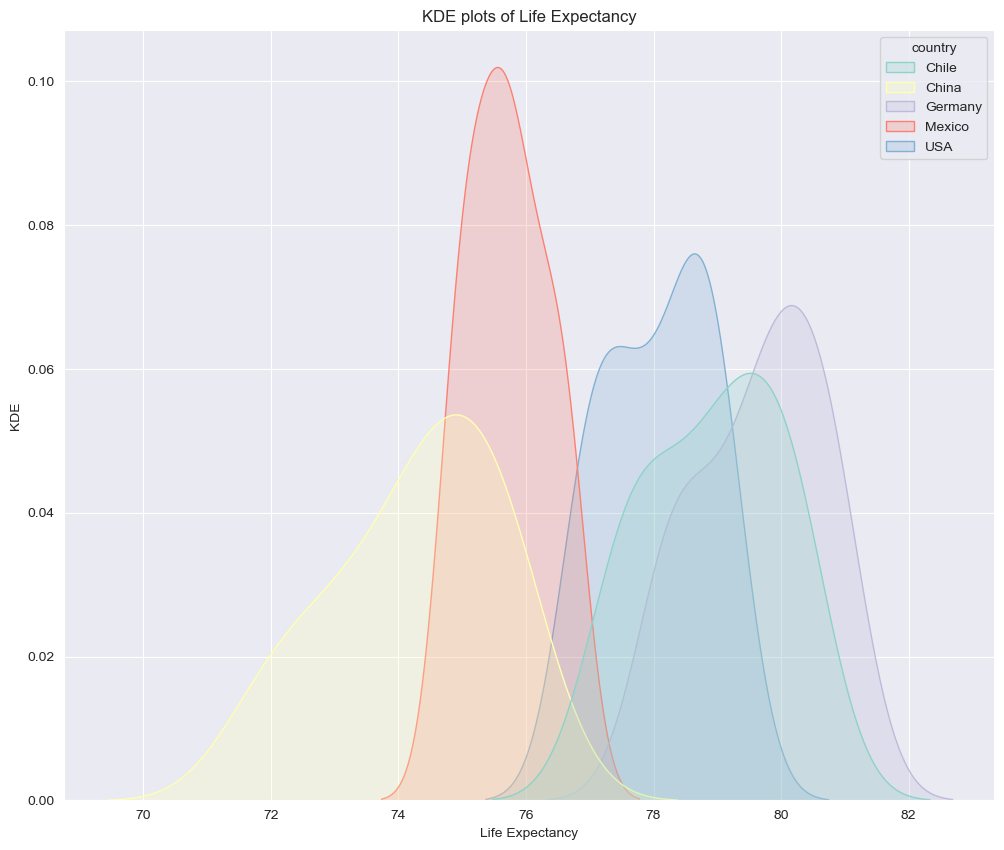

In [33]:
plt.figure(figsize=(12, 10))
sns.set_palette("Set3", 6)
sns.kdeplot(data=who_data.iloc[:80], x=who_data.life_expectancy.iloc[:80], hue=who_data.country.iloc[:80], palette='Set3', fill=True)
plt.title("KDE plots of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("KDE")
plt.show()

## Correlation ##

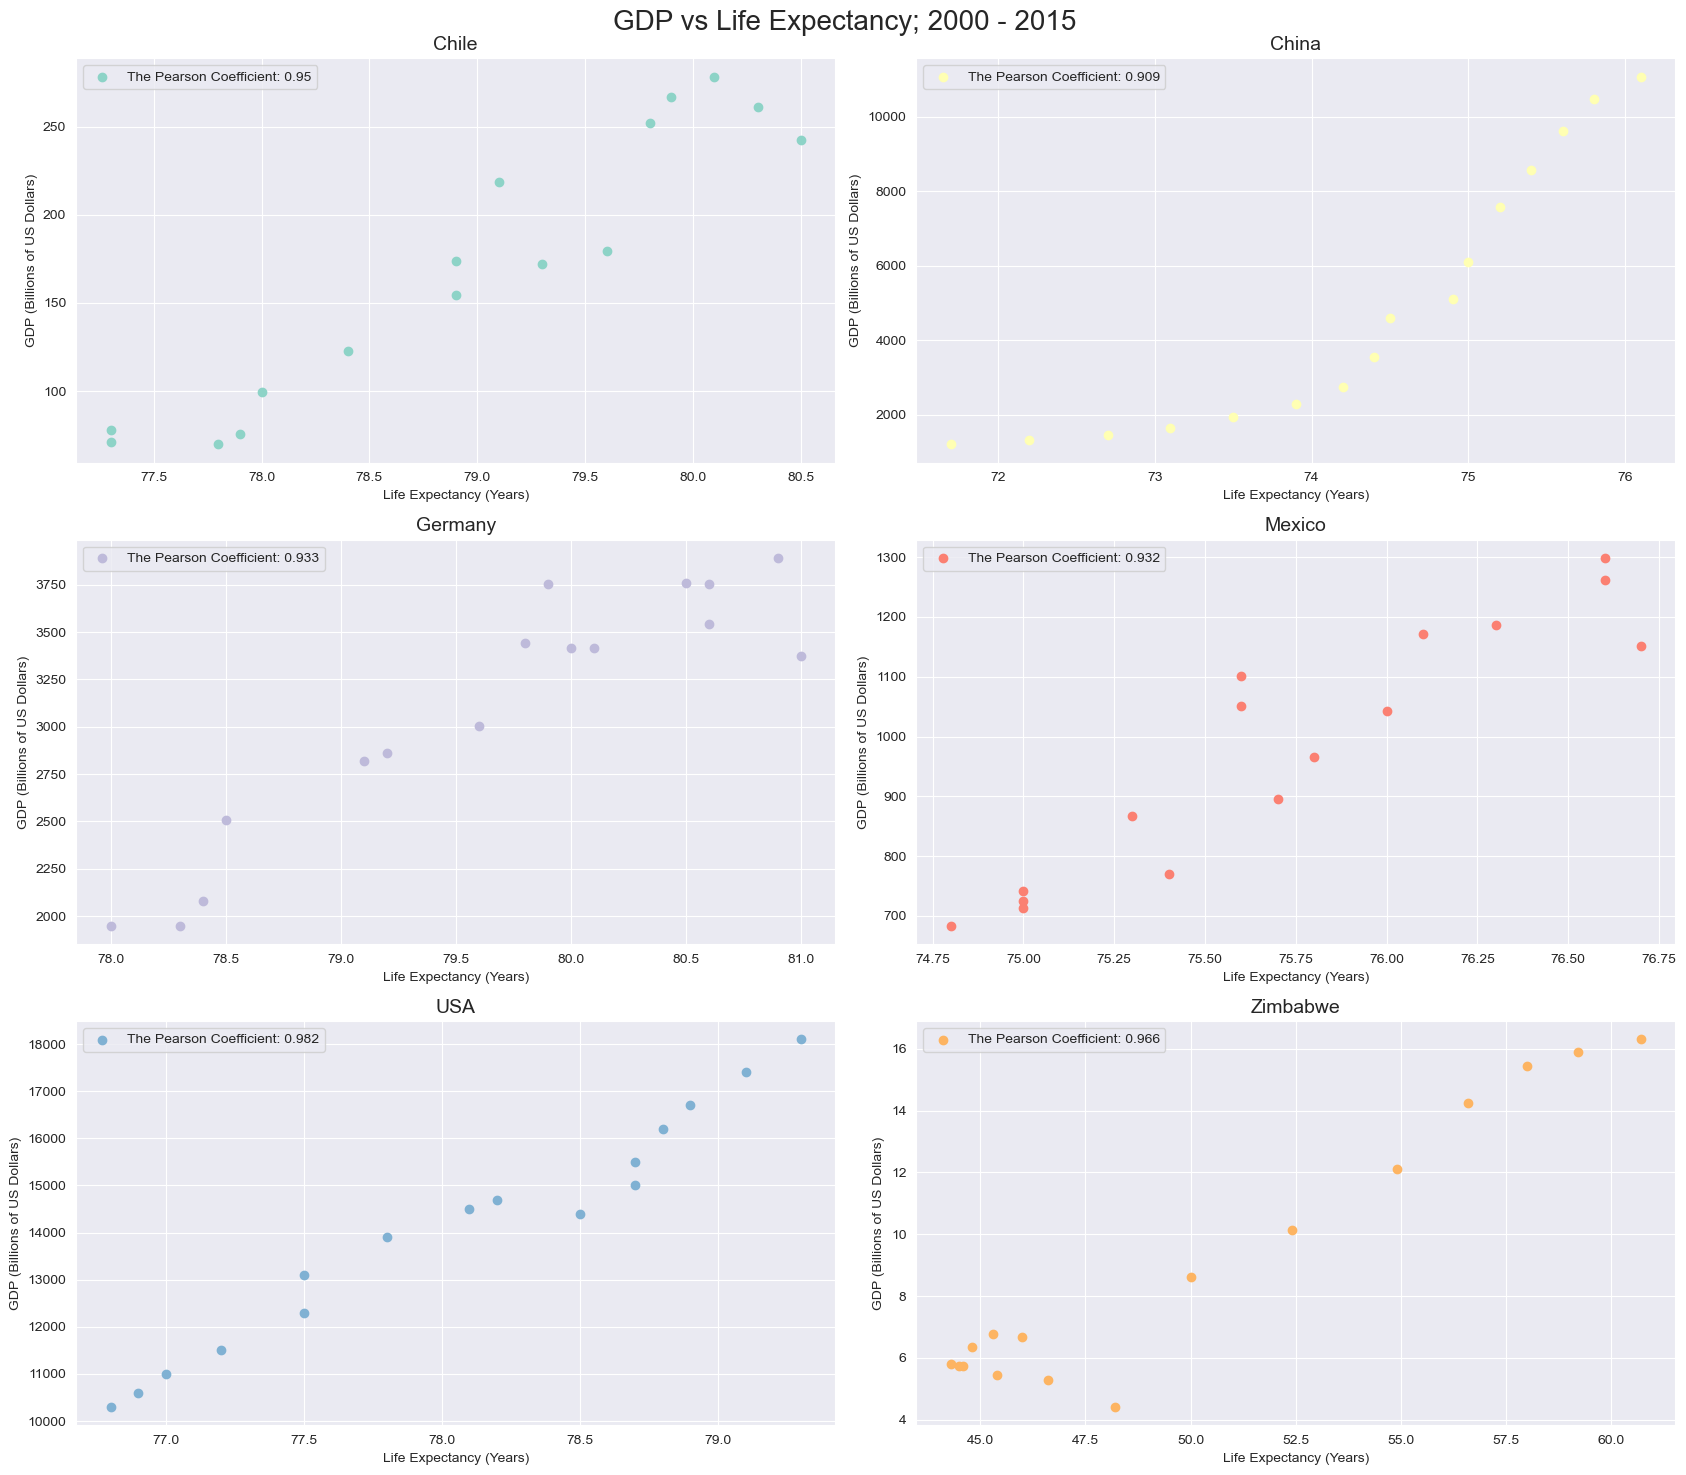

In [23]:
fig = plt.figure(figsize=(17, 15))
for i in range(len(country_list)):
    ax = plt.subplot(3,2,(i+1))
    country = country_list[i]
    data = who_data[who_data["country"] == country]
    #print(f"{country} Statistics:\n {data.describe()}\n")
    correlation, _ = pearsonr(data['life_expectancy'], data['gdp_billions_usd'])
    plt.scatter(data['life_expectancy'], data['gdp_billions_usd'], color=colours[i])
    plt.ylabel("GDP (Billions of US Dollars)")
    plt.xlabel("Life Expectancy (Years)")
    plt.title(country, fontsize=14)
    plt.legend([f"The Pearson Coefficient: {round(correlation,3)}"])
fig.suptitle("GDP vs Life Expectancy; 2000 - 2015", fontsize=20)
fig.tight_layout()
plt.show()

#### There is a correlation between life expectancy and GDP
Further analysis is required.
Not sure I trust the validity of the Pearson coefficient in this instance